In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [22]:
df = data[['duration', 'gross', 'genres', 'movie_title', 'language', 'country', 'budget', 'imdb_score', 'actor_1_name']]
df.head()

,duration,gross,genres,movie_title,language,country,budget,imdb_score,actor_1_name
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,English,USA,237000000.0,7.9,CCH Pounder
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,English,USA,300000000.0,7.1,Johnny Depp
2,148.0,200074175.0,Action|Adventure|Thriller,Spectre,English,UK,245000000.0,6.8,Christoph Waltz
3,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,English,USA,250000000.0,8.5,Tom Hardy
4,NaN,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,7.1,Doug Walker


In [36]:
df_duration = df[df['duration'].notnull()]
criteria = df_duration[ df_duration.iloc[:,0]<= 300 ] 

In [37]:
type(criteria)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Duration histogram of films')

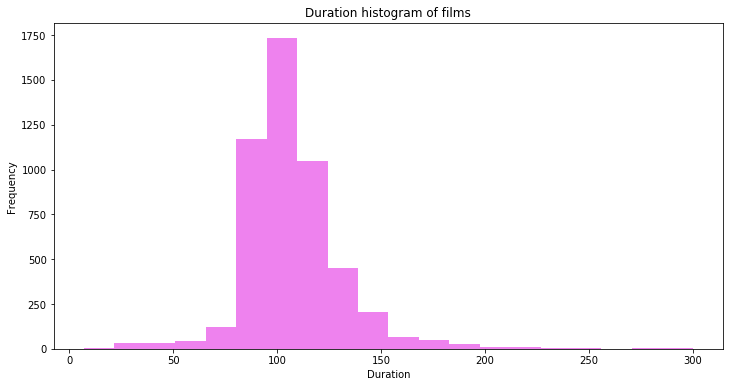

In [162]:
plt.figure(figsize=(12,6))
criteria['duration'].plot(kind='hist', bins=20, color = 'violet')
plt.xlabel('Duration')
plt.title('Duration histogram of films')

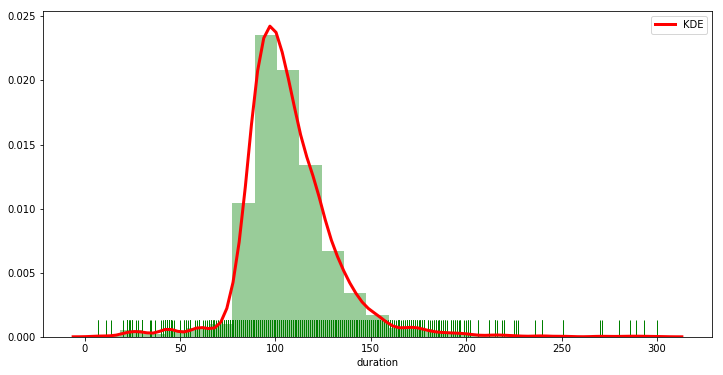

In [185]:
plt.figure(figsize=(12,6))
sb.distplot(criteria['duration'], rug=True, norm_hist = True, color = 'green', bins=25,
           kde_kws={"color": "r", "lw": 3, "label": "KDE"})

In [262]:
df[['duration','genres']].groupby('genres').mean().head()

,duration
genres,
Action,106.181818
Action|Adventure,112.636364
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy,95.000000
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller,45.000000
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,96.000000


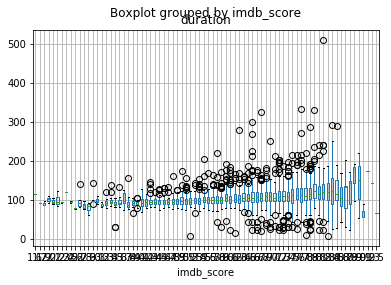

In [190]:
df_duration.boxplot(column='duration', by='imdb_score')

In [400]:
#actor_imdb = data[['imdb_score','actor_1_name']].groupby('actor_1_name').mean()
actor_gross = data[['gross','actor_1_name']].groupby('actor_1_name').sum()

In [418]:
data.groupby('actor_1_name').count()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
actor_1_name,,,,,,,,,,,,,,,,,,,,,,,,,,,
50 Cent,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A.J. Buckley,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
Aaliyah,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Aasif Mandvi,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Abbie Cornish,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Abhishek Bachchan,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2
Abigail Evans,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1
Abigail Spencer,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Adam Arkin,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,1,2


Text(0.5, 0, 'Name of the actor/actress')

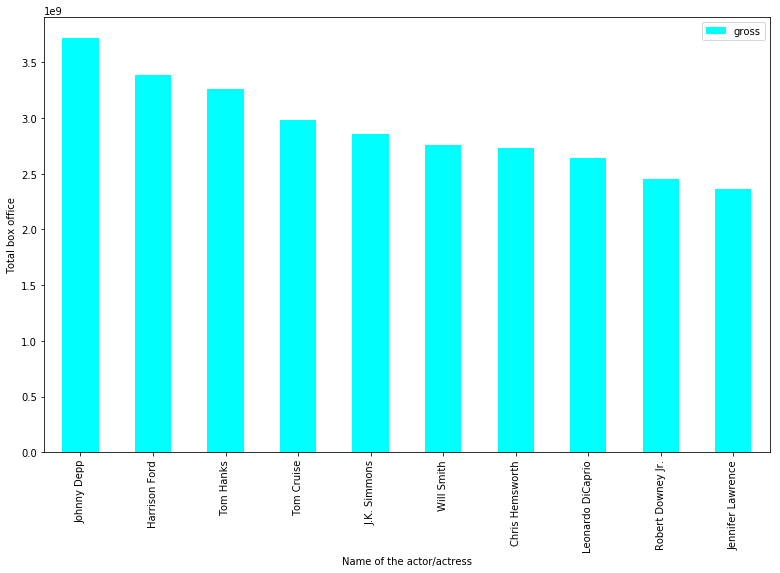

In [414]:
actor_gross.nlargest(10, ['gross']).plot(kind='bar', figsize=(13, 8), color = 'aqua')
plt.ylabel('Total box office')
plt.xlabel('Name of the actor/actress')

Text(0.5, 0, 'Name of the actor/actress')

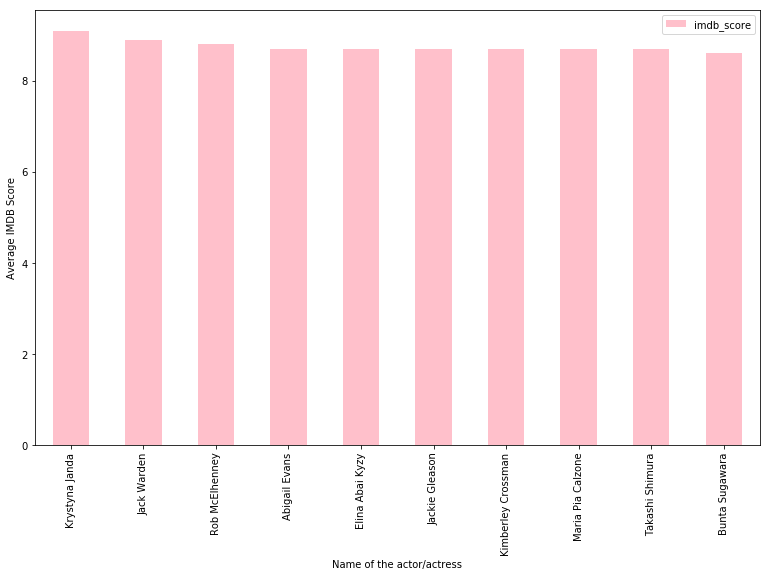

In [420]:
actor_imdb.nlargest(10, ['imdb_score']).plot(kind='bar', figsize=(13, 8), color = 'pink')
plt.ylabel('Average IMDB Score')
plt.xlabel('Name of the actor/actress')

In [13]:
len(df['duration'])

5043

In [14]:
all_top10 = data.language.value_counts().head(10)

Text(0, 0.5, 'Number of films')

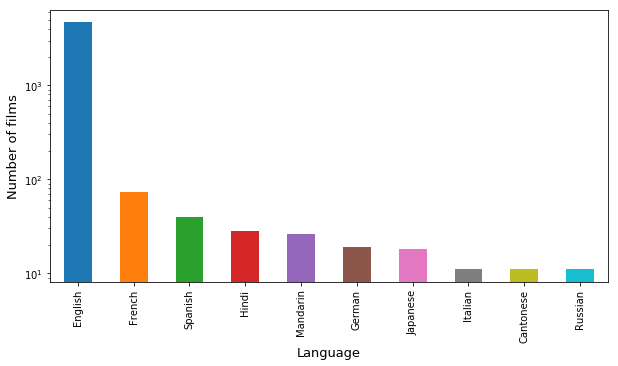

In [61]:
all_top10.plot(kind='bar', logy= 'False', figsize=(10,5))
plt.xlabel('Language', fontsize = 13)
plt.ylabel('Number of films', fontsize = 13)

In [17]:
all_top10_country = data.country.value_counts().head(10)

Text(0, 0.5, 'Number of films')

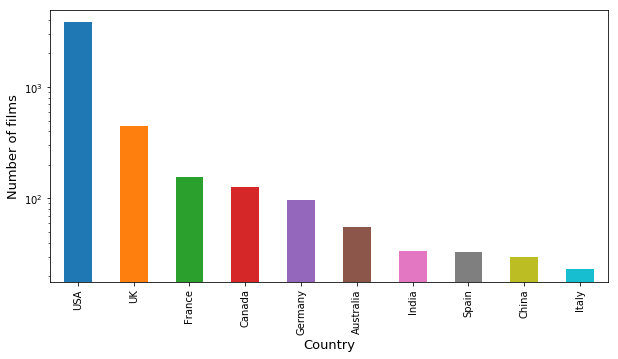

In [62]:
all_top10_country.plot(kind='bar', logy= 'False', figsize=(10,5))
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Number of films', fontsize = 13)

In [203]:
filtered_df = df[df['gross'].notnull()]
filtered_df = filtered_df[filtered_df['budget'].notnull()]
highest_score = filtered_df.nlargest(25, ['imdb_score']) 
highest_score.head()

,duration,gross,genres,movie_title,language,country,budget,imdb_score,actor_1_name
1937,142.0,28341469.0,Crime|Drama,The Shawshank Redemption,English,USA,25000000.0,9.3,Morgan Freeman
3466,175.0,134821952.0,Crime|Drama,The Godfather,English,USA,6000000.0,9.2,Al Pacino
66,152.0,533316061.0,Action|Crime|Drama|Thriller,The Dark Knight,English,USA,185000000.0,9.0,Christian Bale
2837,220.0,57300000.0,Crime|Drama,The Godfather: Part II,English,USA,13000000.0,9.0,Robert De Niro
339,192.0,377019252.0,Action|Adventure|Drama|Fantasy,The Lord of the Rings: The Return of the King,English,USA,94000000.0,8.9,Orlando Bloom


Text(0.5, 1.0, '')

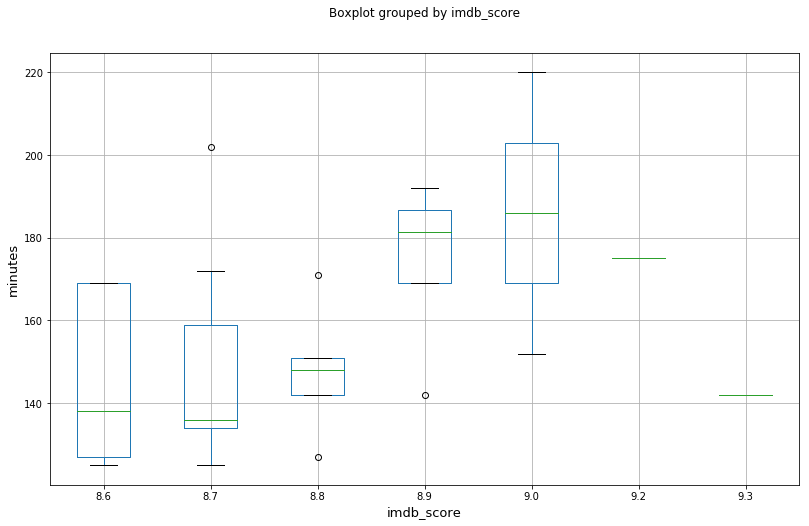

In [207]:
highest_score.boxplot(column='duration', by='imdb_score', figsize=(13, 8))
plt.ylabel('minutes', fontsize=13)
plt.xlabel('imdb_score', fontsize=13)
plt.title('')

In [130]:
highest_boxoffice = filtered_df.nlargest(10, ['gross'])
highest_boxoffice.head()

,duration,gross,genres,movie_title,language,country,budget,imdb_score,actor_1_name
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,English,USA,237000000.0,7.9,CCH Pounder
26,194.0,658672302.0,Drama|Romance,Titanic,English,USA,200000000.0,7.7,Leonardo DiCaprio
29,124.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Jurassic World,English,USA,150000000.0,7.0,Bryce Dallas Howard
17,173.0,623279547.0,Action|Adventure|Sci-Fi,The Avengers,English,USA,220000000.0,8.1,Chris Hemsworth
794,173.0,623279547.0,Action|Adventure|Sci-Fi,The Avengers,English,USA,220000000.0,8.1,Chris Hemsworth


In [154]:
highest_budget = filtered_df.nlargest(10, ['budget'])
highest_budget.head()

,duration,gross,genres,movie_title,language,country,budget,imdb_score,actor_1_name
2988,110.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,The Host,Korean,South Korea,1.221550e+10,7.0,Doona Bae
3859,112.0,211667.0,Crime|Drama,Lady Vengeance,Korean,South Korea,4.200000e+09,7.7,Min-sik Choi
3005,134.0,195888.0,Drama|Romance|War,Fateless,Hungarian,Hungary,2.500000e+09,7.1,Marcell Nagy
2323,134.0,2298191.0,Adventure|Animation|Fantasy,Princess Mononoke,Japanese,Japan,2.400000e+09,8.4,Minnie Driver
2334,103.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,Steamboy,Japanese,Japan,2.127520e+09,6.9,William Hootkins


Text(0.5, 1.0, 'Box office and IMDB score relationship')

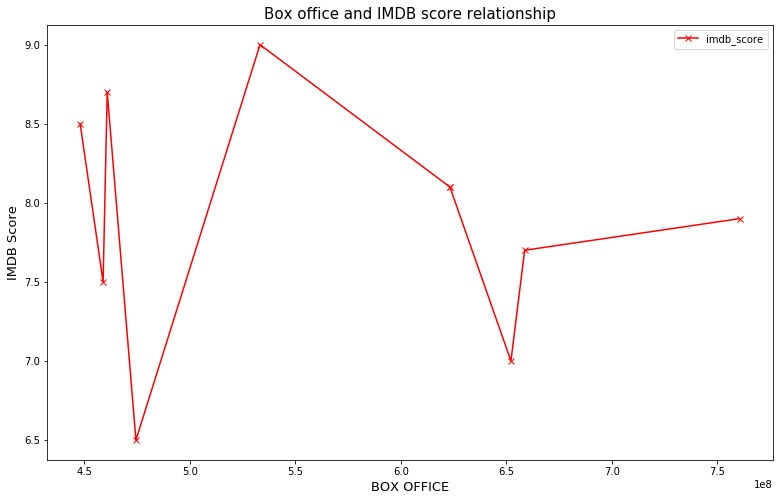

In [157]:
highest_boxoffice.plot(kind ='line', x="gross", y='imdb_score', figsize=(13, 8), marker = 'x', color = 'red')
plt.xlabel('BOX OFFICE', fontsize = 13)
plt.ylabel('IMDB Score', fontsize = 13)
plt.title('Box office and IMDB score relationship', fontsize=15)

Text(0.5, 1.0, 'Budget and IMDB score relationship')

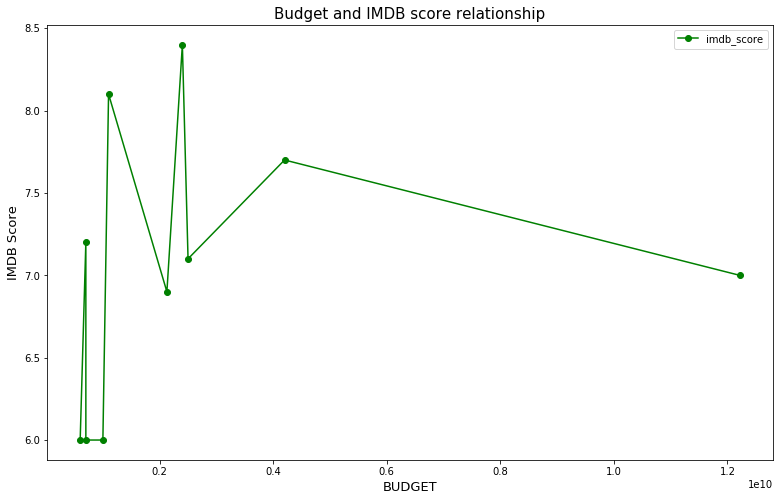

In [159]:
highest_budget.plot(kind ='line', x="budget", y='imdb_score', figsize=(13, 8), marker = 'o', color = 'green')
plt.xlabel('BUDGET', fontsize = 13)
plt.ylabel('IMDB Score', fontsize = 13)
plt.title('Budget and IMDB score relationship', fontsize=15)

In [240]:
top_20_gross = filtered_df.nlargest(100, ['gross'])

Text(0.5, 1.0, 'Box office and budget relationship - Top 100')

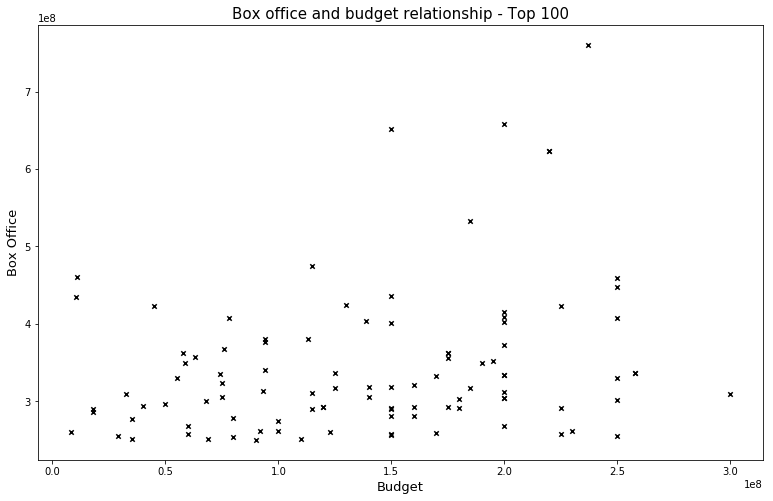

In [242]:
top_20_gross.plot(kind ='scatter', x="budget", y='gross', figsize=(13, 8), marker = 'x', color = 'black')
plt.xlabel('Budget', fontsize = 13)
plt.ylabel('Box Office', fontsize = 13)
plt.title('Box office and budget relationship - Top 100', fontsize=15)

Text(0.5, 1.0, 'Box office and budget relationship - Top 10')

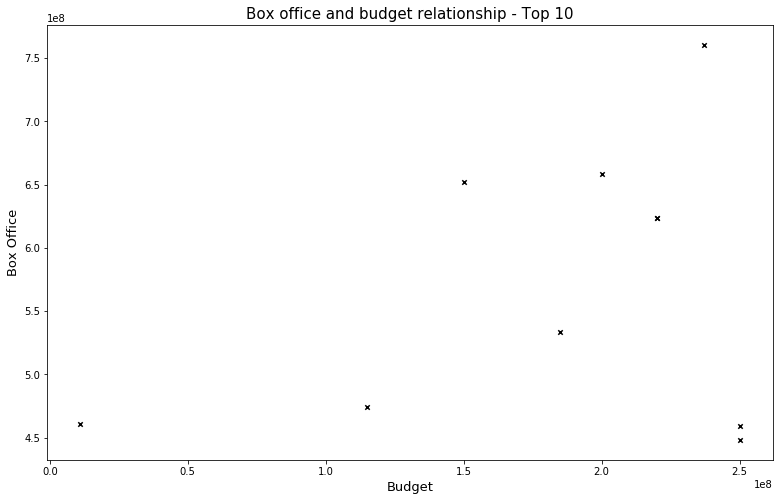

In [243]:
highest_boxoffice.plot(kind ='scatter', x="budget", y='gross', figsize=(13, 8), marker = 'x', color = 'black')
plt.xlabel('Budget', fontsize = 13)
plt.ylabel('Box Office', fontsize = 13)
plt.title('Box office and budget relationship - Top 10', fontsize=15)

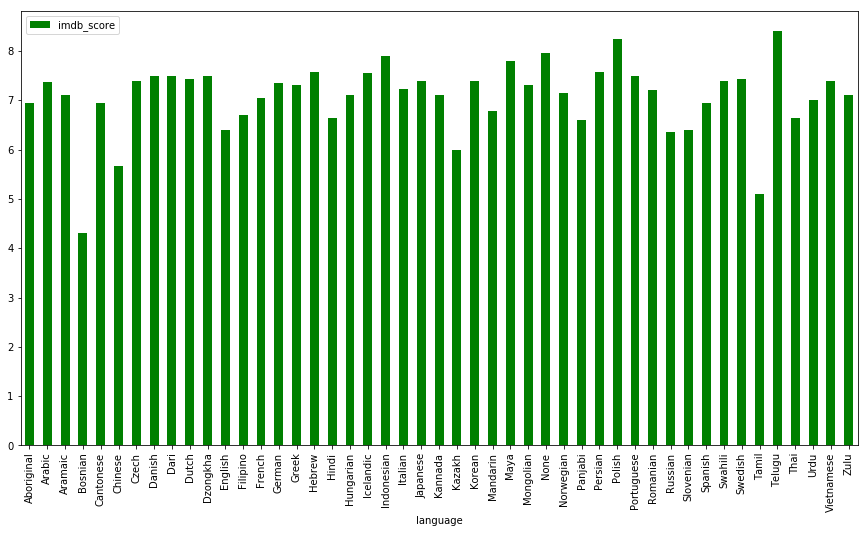

In [274]:
language_imdb.plot(kind='bar', figsize=(15, 8), color = 'green')

In [258]:
all_top10.head()

English     4704
French        73
Spanish       40
Hindi         28
Mandarin      26
Name: language, dtype: int64

In [246]:
italy = df.loc[df['language'] == 'Italian']
italy_top_5 = italy.nlargest(5, ['imdb_score'])

,duration,gross,genres,movie_title,language,country,budget,imdb_score,actor_1_name
1957,90.0,15091542.0,Adventure|Family|Fantasy|Musical,The Adventures of Pinocchio,Italian,UK,25000000.0,5.3,Martin Landau
2992,172.0,2835886.0,Drama,The Great Beauty,Italian,Italy,9200000.0,7.7,Toni Servillo
3189,120.0,5004648.0,Drama|Romance,I Am Love,Italian,Italy,10000000.0,7.0,Flavio Parenti
3283,110.0,NaN,Comedy|Drama|Romance,Loose Cannons,Italian,Italy,NaN,7.3,Riccardo Scamarcio
3551,125.0,223878.0,Comedy|Drama|Romance,"Remember Me, My Love",Italian,Italy,5000000.0,6.5,Laura Morante
3579,55.0,NaN,Crime|Drama|Thriller,Gomorrah,Italian,Italy,NaN,8.7,Maria Pia Calzone
4136,100.0,NaN,Comedy,Four Single Fathers,Italian,Italy,3000000.0,5.1,Stephanie Szostak
4498,142.0,6100000.0,Western,"The Good, the Bad and the Ugly",Italian,Italy,1200000.0,8.9,Clint Eastwood
4682,106.0,NaN,Drama,The Conformist,Italian,Italy,750000.0,8.1,Jean-Louis Trintignant
4802,82.0,126387.0,Horror,The Beyond,Italian,Italy,400000.0,6.9,Catriona MacColl


In [327]:
italy_top_5 = italy.nlargest(5, ['imdb_score'])
italy_top_5

,duration,gross,genres,movie_title,language,country,budget,imdb_score,actor_1_name
4498,142.0,6100000.0,Western,"The Good, the Bad and the Ugly",Italian,Italy,1200000.0,8.9,Clint Eastwood
3579,55.0,NaN,Crime|Drama|Thriller,Gomorrah,Italian,Italy,NaN,8.7,Maria Pia Calzone
4682,106.0,NaN,Drama,The Conformist,Italian,Italy,750000.0,8.1,Jean-Louis Trintignant
4897,99.0,3500000.0,Action|Drama|Western,A Fistful of Dollars,Italian,Italy,200000.0,8.0,Clint Eastwood
2992,172.0,2835886.0,Drama,The Great Beauty,Italian,Italy,9200000.0,7.7,Toni Servillo


Text(0, 0.5, 'IMDB score')

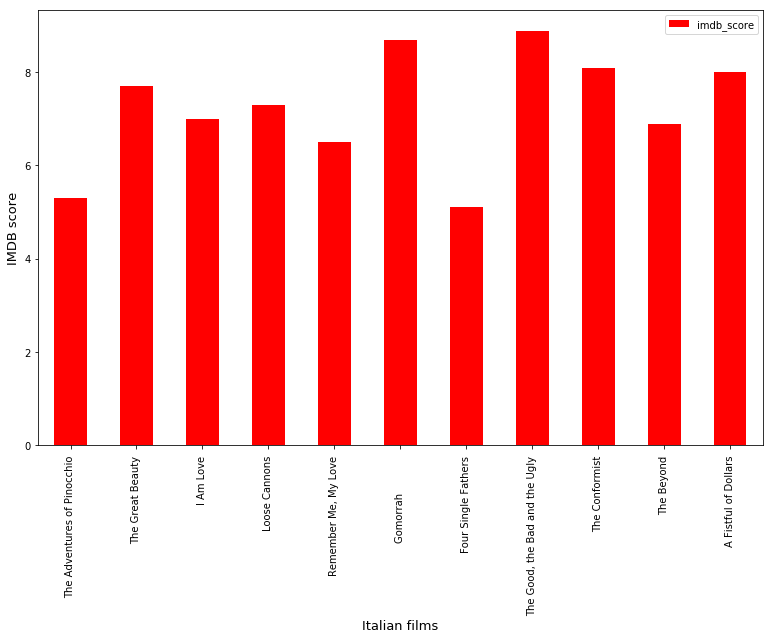

In [422]:
italy.plot(kind ='bar', x="movie_title", y='imdb_score', figsize=(13, 8), color = 'red')
plt.xlabel('Italian films', fontsize = 13)
plt.ylabel('IMDB score', fontsize = 13)

In [97]:
print(df[df['duration'] <= 120]['imdb_score'].mean())
print(df[df['duration'] >= 120]['imdb_score'].mean())

6.277833880333249
7.046113537117903


In [65]:
df_corr = df[df['gross'].notnull()]

In [67]:
df_corr = df_corr[df_corr['imdb_score'].notnull()]

In [69]:
df_corr['gross'].corr(df_corr['imdb_score'])

0.19802122755403434

In [74]:
df_scatter = df_corr[['gross', 'imdb_score', ]]
df_scatter.head()

,gross,imdb_score
0,760505847.0,7.9
1,309404152.0,7.1
2,200074175.0,6.8
3,448130642.0,8.5
5,73058679.0,6.6


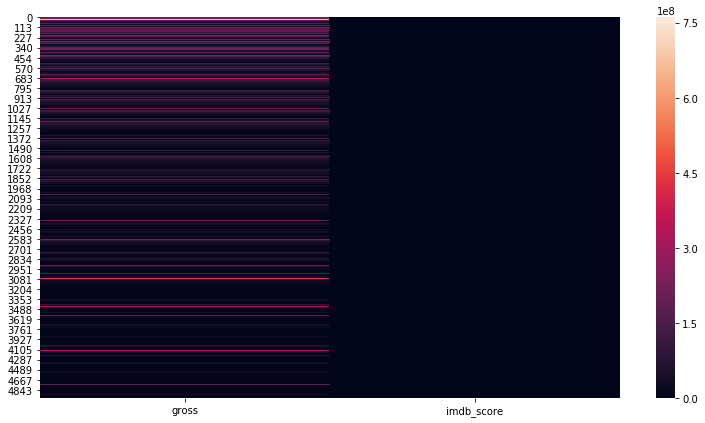

In [76]:
plt.figure(figsize=(13,7))
sb.heatmap(df_scatter)


In [91]:
imdb_1000 = pd.read_csv('imdb_1000.csv')

In [92]:
imdb_1000.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


Text(0.5, 1.0, 'Duration per genre')

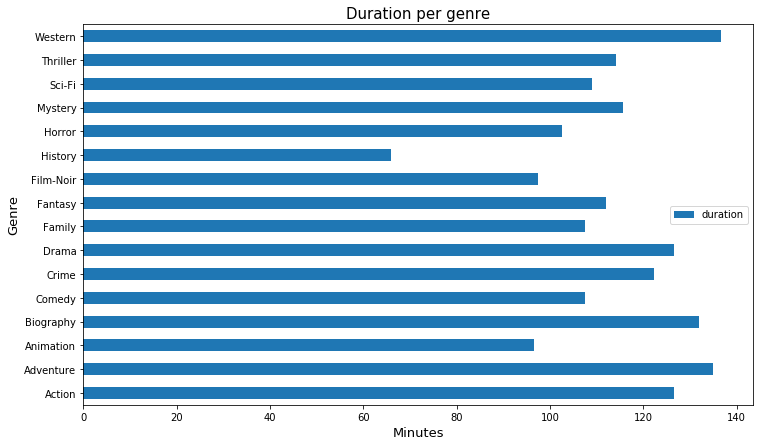

In [122]:
genre_by_minute = imdb_1000[['duration','genre']].groupby('genre').mean()
genre_by_minute.plot(kind='barh', figsize=(12,7,))
plt.xlabel('Minutes', fontsize = 13)
plt.ylabel('Genre', fontsize = 13)
plt.title('Duration per genre', fontsize=15)

#plt.ylabel('minutes')

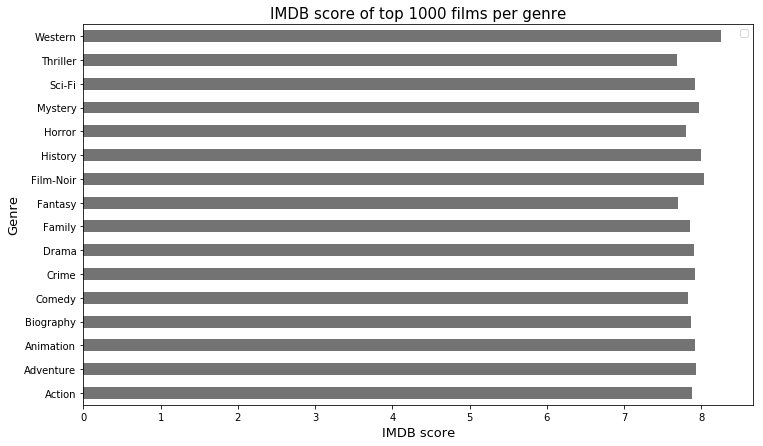

In [360]:
genre_by_score = imdb_1000[['star_rating','genre']].groupby('genre').mean()
genre_by_score.plot(kind='barh', figsize=(12,7,), color = '0.45')
plt.xlabel('IMDB score', fontsize = 13)
plt.ylabel('Genre', fontsize = 13)
plt.title('IMDB score of top 1000 films per genre', fontsize=15)
plt.legend('')

In [282]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


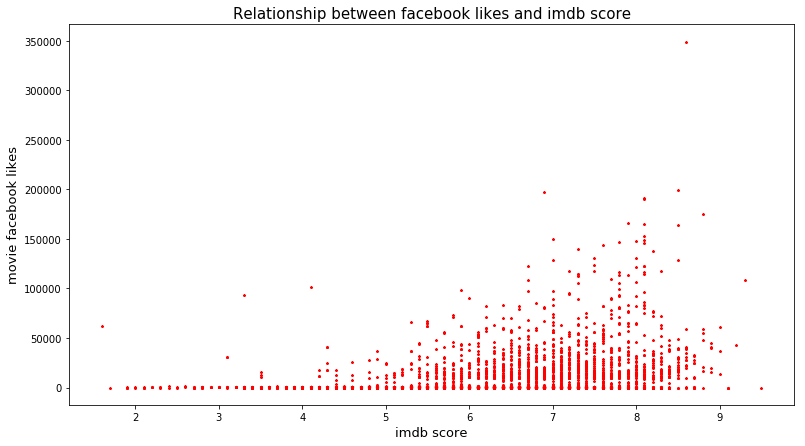

In [296]:
plt.figure(figsize=(13,7))
score_likes = data[['imdb_score', 'movie_facebook_likes']]
plt.scatter(score_likes['imdb_score'].values, score_likes['movie_facebook_likes'].values, s=[5], marker='*', c='red')
plt.xlabel('imdb score', fontsize = '13')
plt.ylabel('movie facebook likes', fontsize = '13' )
plt.title('Relationship between facebook likes and imdb score', fontsize = 15)
plt.show()

In [298]:
import numpy as np

In [301]:
df2 = data.copy()
profit = (df2['gross']-df2['budget'])
df2.insert(len(df.columns),'profit',profit)
def plot_vs_year(df2, y="gross"):
    df_t = df2.pivot_table(index="title_year", values=y, aggfunc=np.mean)
    plt.plot(df_t.index, df_t.values, "-bo")
    plt.ylabel(y)
    plt.xlabel("Year")

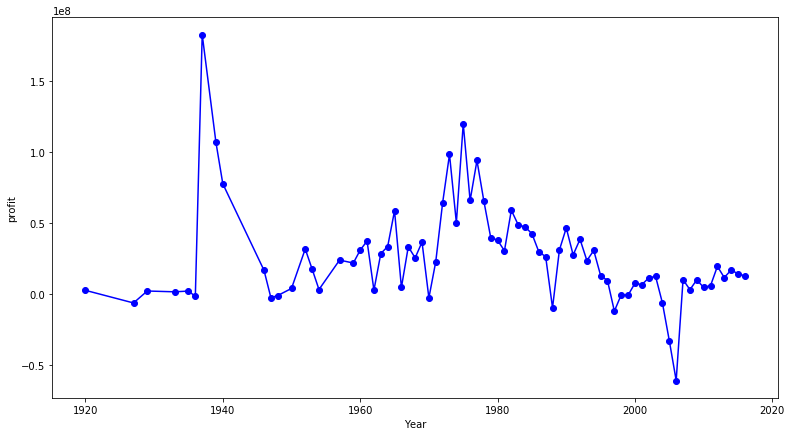

In [300]:
plt.figure(figsize=(13,7))
plot_vs_year(df2, "profit")

Text(0.5, 0, 'Year')

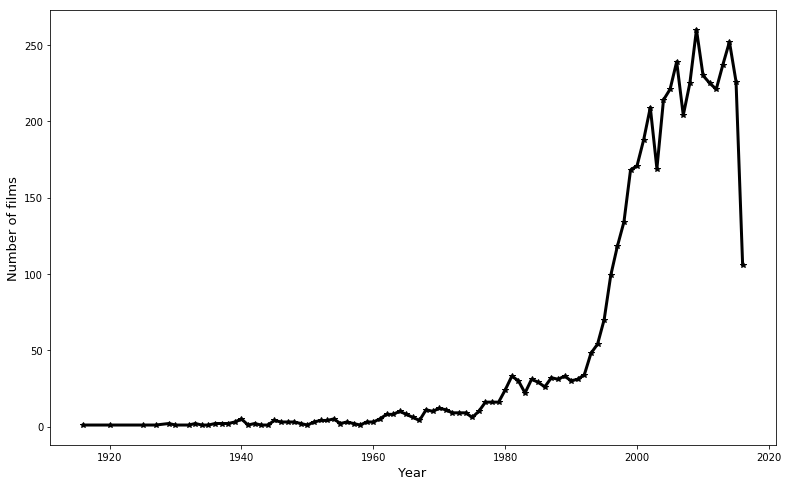

In [366]:
movies_year = data.groupby(['title_year'])['movie_title'].count()
movies_year.head()
 
movies_year.plot('line', figsize=(13, 8), color = 'black',  linewidth=3, marker = '*')
plt.ylabel('Number of films', fontsize = 13)
plt.xlabel('Year', fontsize = 13)

In [313]:
Facebook_likes = data[['movie_facebook_likes', 'director_facebook_likes', 'cast_total_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']]
Facebook_likes.head()

,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
0,33000,0.0,4834,1000.0,936.0,855.0
1,0,563.0,48350,40000.0,5000.0,1000.0
2,85000,0.0,11700,11000.0,393.0,161.0
3,164000,22000.0,106759,27000.0,23000.0,23000.0
4,0,131.0,143,131.0,12.0,NaN


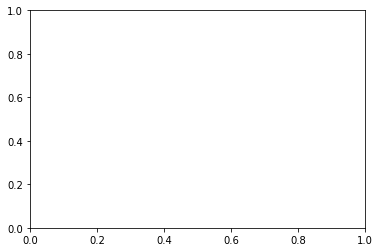

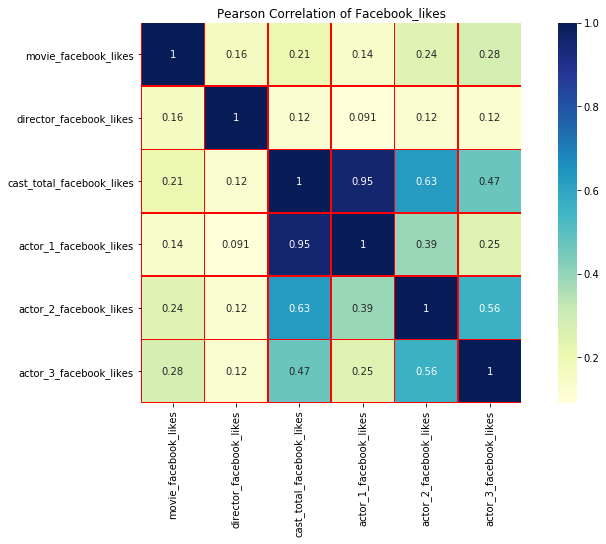

In [320]:

f, ax = plt.subplots()
plt.figure(figsize=(13, 7))
plt.title('Pearson Correlation of Facebook_likes')
sb.heatmap(Facebook_likes.corr(),linewidths=0.5,vmax=1.0, annot=True, square=True, cmap="YlGnBu", linecolor = 'red')

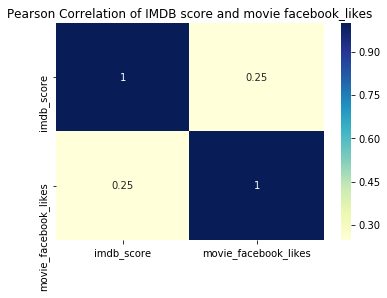

In [321]:
plt.title('Pearson Correlation of IMDB score and movie facebook_likes')

sb.heatmap(score_likes.corr(), annot=True, cmap="YlGnBu")

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


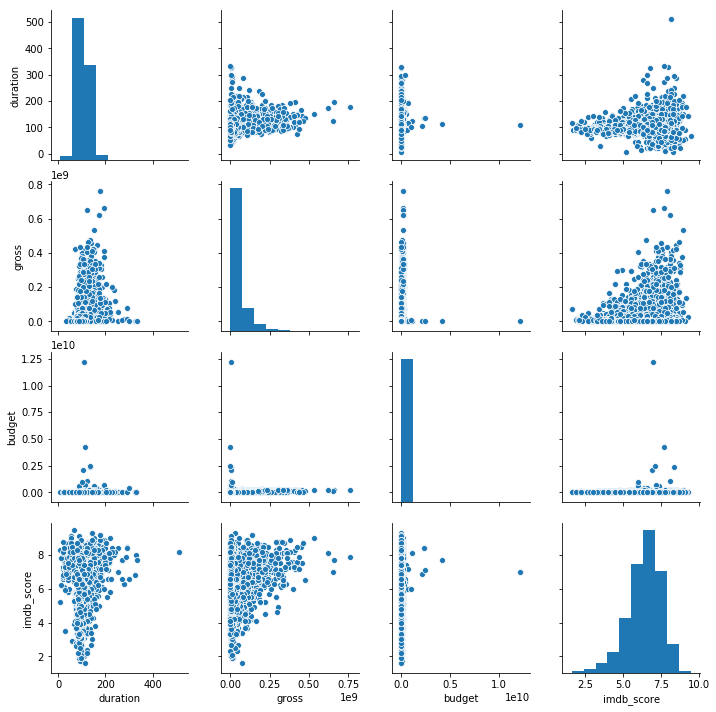

In [367]:
sb.pairplot(df)

In [371]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


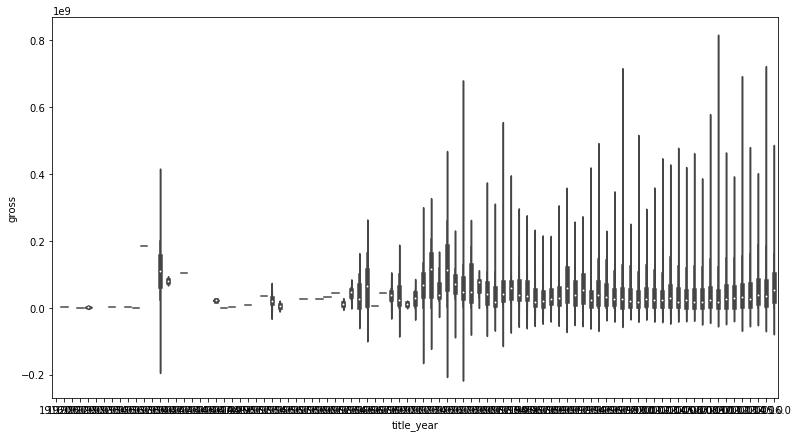

In [377]:
plt.figure(figsize=(13, 7))
ax = sb.violinplot(x="title_year", y="gross", data=data)

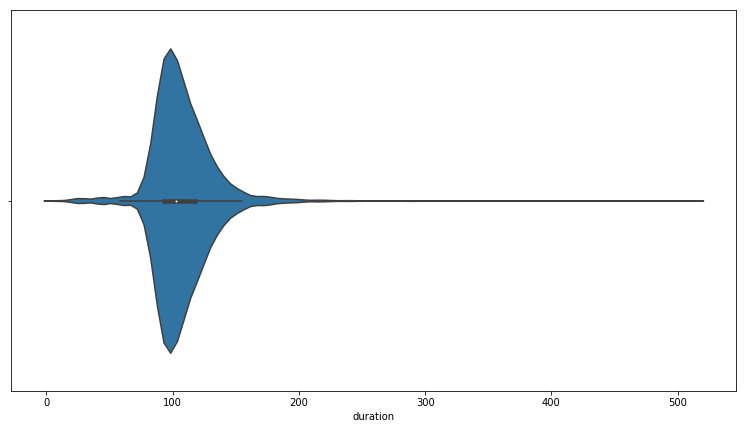

In [381]:
plt.figure(figsize=(13, 7))
ax = sb.violinplot(x="duration",  data=data)

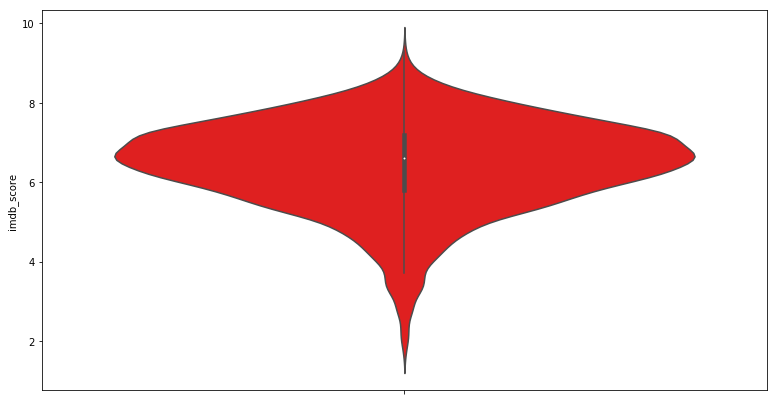

In [385]:
plt.figure(figsize=(13, 7))
ax = sb.violinplot(y="imdb_score",  data=data, color='red')

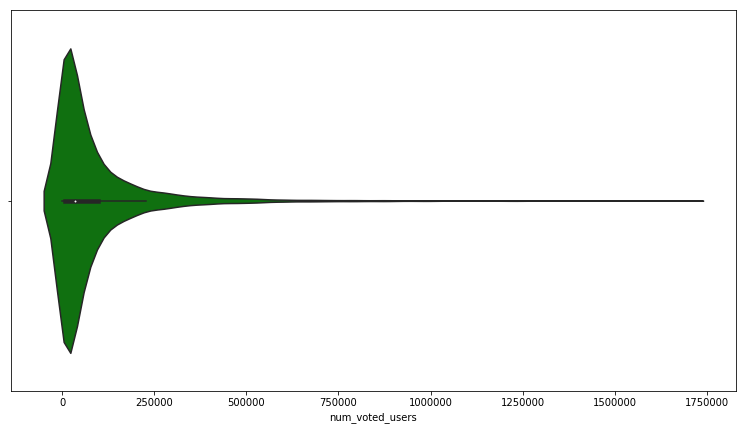

In [387]:
plt.figure(figsize=(13, 7))
ax = sb.violinplot(x="num_voted_users",  data=data, color='green')

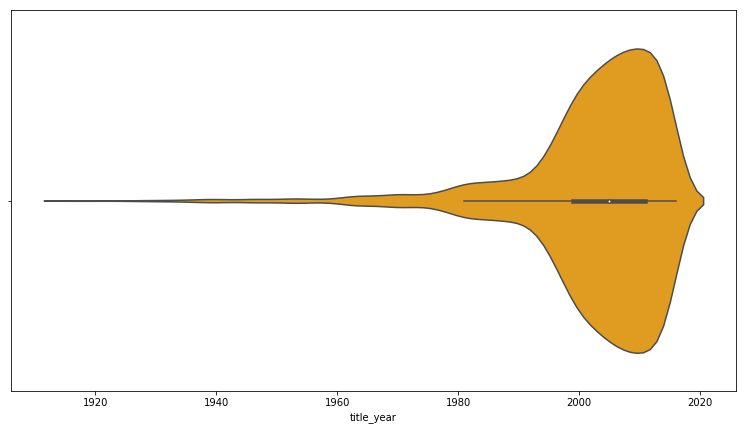

In [392]:
plt.figure(figsize=(13, 7))
ax = sb.violinplot(x="title_year",  data=data, color='orange')